In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('covid19_tweets.txt')

In [4]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


# Preprocessing

In [12]:
# Text cleaning package
import neattext.functions as nfx

In [18]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [16]:
# Remove hashtags
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [21]:
# Check removal
df[['clean_tweet', 'text']]

,clean_tweet,text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey and - wouldn't it have made more sen...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Trump never once claimed was a hoax. W...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,The one gift has give me is an appreciatio...,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel \n ...,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...
179103,Thanks for nominating me for the challen...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! https://t.c...,2020! The year of insanity! Lol! #COVID19 http...
179105,A powerful painting by Juan Lucena. It's a t...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for a...","More than 1,200 students test positive for #CO..."


In [20]:
# Remove user handles
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_userhandles)

In [22]:
# remove additional spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [23]:
# remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [24]:
# remove punctuation
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [27]:
df[['clean_tweet', 'text']]

,clean_tweet,text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey and wouldnt it have made more sense to ha...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Trump never once claimed was a hoax We all cl...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,The one gift has give me is an appreciation f...,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...
179103,Thanks for nominating me for the challenge I n...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020 The year of insanity Lol,2020! The year of insanity! Lol! #COVID19 http...
179105,A powerful painting by Juan Lucena Its a trib...,@CTVNews A powerful painting by Juan Lucena. I...
179106,More than 1200 students test positive for at m...,"More than 1,200 students test positive for #CO..."


# Sentiment Analysis

In [30]:
from textblob import TextBlob

In [33]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        sentiment_label = "Positive"
    elif sentiment_polarity < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"
        
    result = {'polarity': sentiment_polarity,
             'subjectivity': sentiment_subjectivity,
             'sentiment': sentiment_label}
    return result

In [32]:
ex1 = df['clean_tweet'].iloc[0]

In [34]:
get_sentiment(ex1)

{'polarity': -0.25, 'subjectivity': -0.25, 'sentiment': 'Negative'}

In [35]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [37]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'subjectivity': -0.25, 'sentiment': 'Negative'}

In [38]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,-0.25,Negative


In [40]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [41]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': -0.25, 'se...",-0.25,-0.25,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.50,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.00,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.00,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.00,Neutral


### Plotting

<AxesSubplot:>

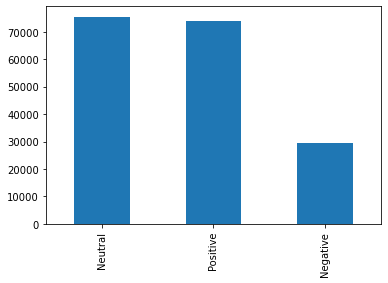

In [45]:
# Plot sentiment values
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

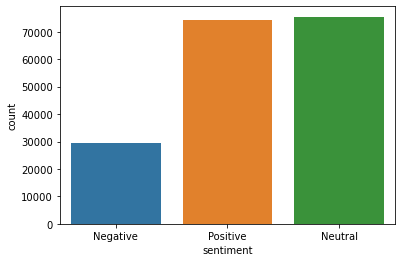

In [46]:
sns.countplot(df['sentiment'])

### Specificity

In [52]:
# Extract keywords
positive_tweet = df[df['sentiment'] == "Positive"]['clean_tweet']
neutral_tweet = df[df['sentiment'] == "Neutral"]['clean_tweet']
negative_tweet = df[df['sentiment'] == "Negative"]['clean_tweet']

In [50]:
positive_tweet.head()

1     Hey and  wouldnt it have made more sense to ha...
6     How Will Change Work in General (and recruitin...
8             Praying for good health and recovery of  
12    👋🏻 — no one will be safe from until everyone i...
13    Lets all protect ourselves from Its real and t...
Name: clean_tweet, dtype: object

In [54]:
# Remove stopwords
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).to_list()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).to_list()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).to_list()

In [57]:
positive_tweet_list

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

In [56]:
pos_token = [token for line in positive_tweet_list for token in line.split()]
net_token = [token for line in neutral_tweet_list for token in line.split()]
neg_token = [token for line in negative_tweet_list for token in line.split()]

## Identify keywords in each sentiment

In [59]:
# keywords
from collections import Counter

In [63]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    
    return result

In [67]:
most_common_pos_words = get_tokens(pos_token)
most_common_net_words = get_tokens(net_token)
most_common_neg_words = get_tokens(neg_token)

In [82]:
neg_df = pd.DataFrame(most_common_neg_words.items(), columns=['Word', 'Count'])
net_df = pd.DataFrame(most_common_net_words.items(), columns=['Word', 'Count'])
pos_df = pd.DataFrame(most_common_pos_words.items(), columns=['Word', 'Count'])

In [73]:
neg_df.head()

,Word,Count
0,cases,2245
1,amp,2033
2,people,1801
3,pandemic,895
4,spread,870


<AxesSubplot:xlabel='Word', ylabel='Count'>

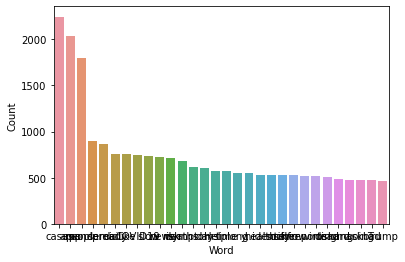

In [80]:
sns.barplot(x='Word', y='Count', data=neg_df)

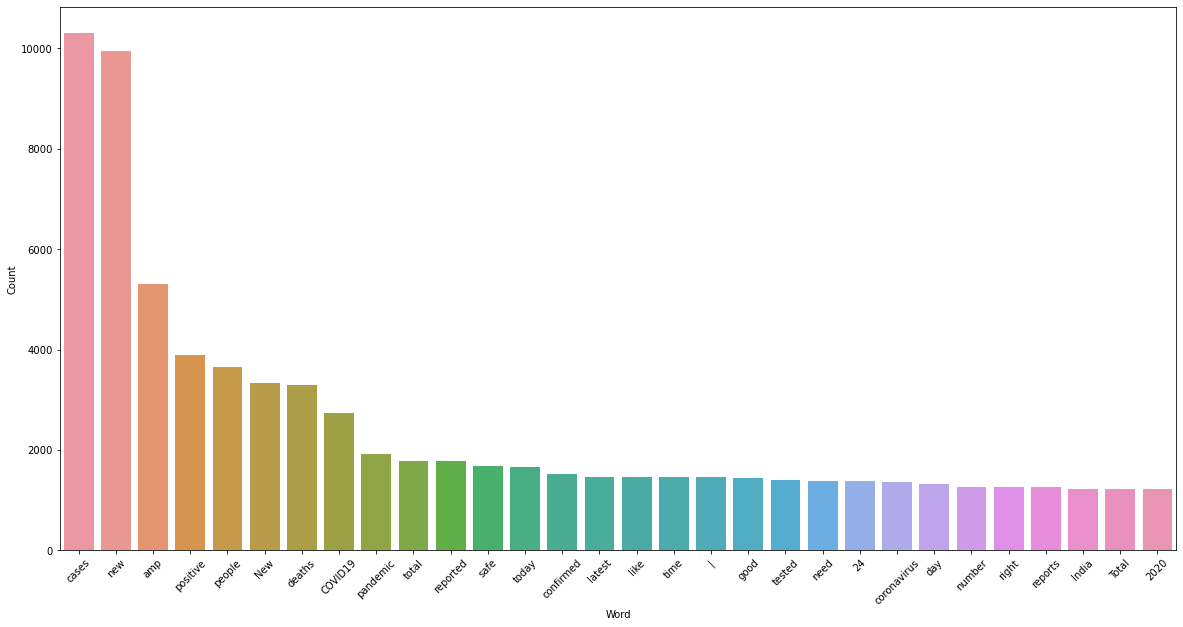

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x='Word', y='Count', data=pos_df)
plt.xticks(rotation=45)
plt.show()

# WordCloud

In [86]:
from wordcloud import WordCloud

In [92]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [93]:
# setup tokens as a document
pos_docx = ''.join(pos_token)
net_docx = ''.join(net_token)
neg_docx = ''.join(neg_token)

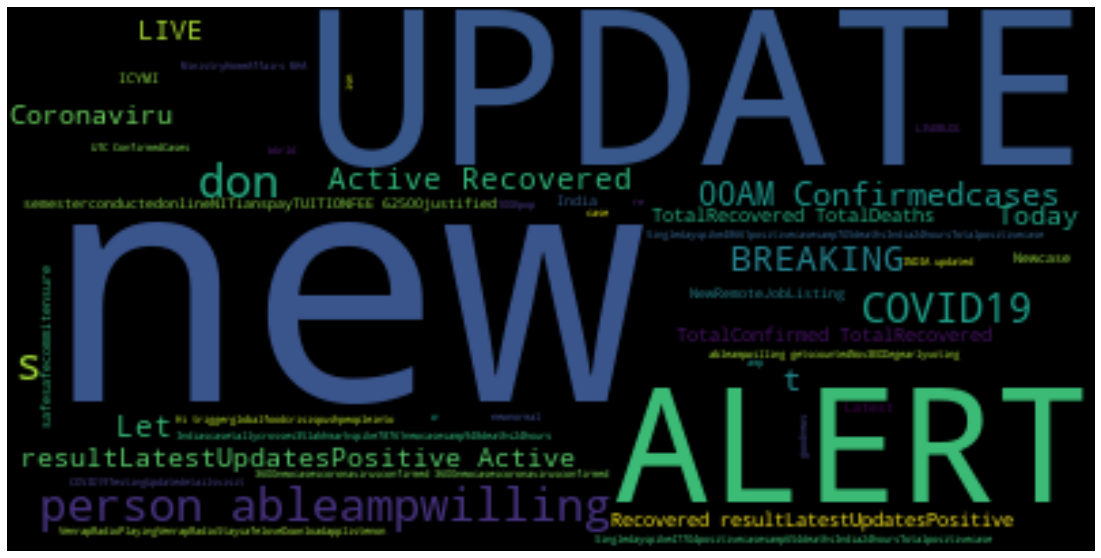

In [94]:
plot_wordcloud(pos_docx)